<a href="https://colab.research.google.com/github/ivanna0994/seriesdetiempo/blob/main/TP1/Codigoseriesdetiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detección de Patrones Climáticos a través del Análisis de Series Temporales de Temperatural

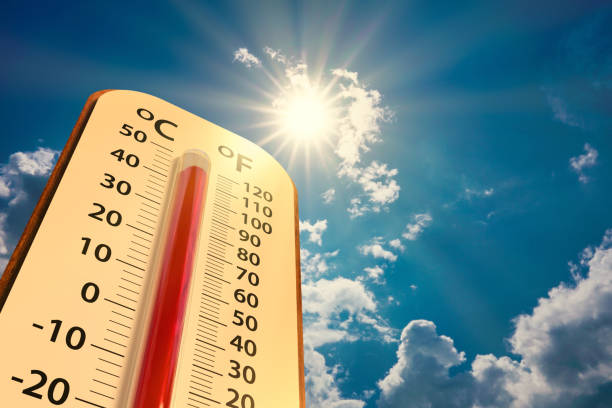

In [2]:
#Cargamos librerias
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from scipy.stats import shapiro
from IPython import get_ipython
from IPython.display import display

In [3]:
# Cargamos datos
file_path = '/content/jena_climate_2009_2016.csv'
df = pd.read_csv(file_path)
print(df.head())

             Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03        

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB
None


Esta base de datos contiene 420551 filas y 15 columnas

In [5]:
print('No. of rows, columns:', df.shape)

No. of rows, columns: (420551, 15)


Para verificar sí existen o no datos faltantes, se procede a realizar la consulta a nuestra base de datos

In [6]:
print(df.isnull().sum())

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64


Encontrándose así que no existen datos nulos.
El dataset contiene datos climáticos con registros cada 10 minutos.
La variable "Date Time" está en formato de texto y debe convertirse a formato de fecha y hora.
La variable de interés "T (degC)" representa la temperatura en grados Celsius.
Nuestro análisis se centrará en las variables, día, mes y año y hora en que fue tomada la temperatura, el cual se encuentra en el conjunto de datos bajo el nombre de 'Date Time' así como también la variable temperatura que contiene los valores de esta, y en el conjunto de datos se encuentra como T(degC)

In [7]:
# Convertir la columna "Date Time" a formato datetime
df["Date Time"] = pd.to_datetime(df["Date Time"], format="%d.%m.%Y %H:%M:%S")

# Verificar el rango de fechas en el dataset
date_range = df["Date Time"].min(), df["Date Time"].max()



Ya hecha la transformación de la variable Date time, se realiza una breve descripción estadística de la variable a estudiar, que en este caso es Temperatura medida en grados celsius.

In [8]:
# Descripción estadística de la variable T (degC)
temperature_stats = df['T (degC)'].describe()
print(temperature_stats)

count    420551.000000
mean          9.450147
std           8.423365
min         -23.010000
25%           3.360000
50%           9.420000
75%          15.470000
max          37.280000
Name: T (degC), dtype: float64


Como se mencionó anteriormente, para la variable Temperatura en grados celsius, se tienen 420551 observaciones, con una media de 9.45° y una desviación estándar de 8.42°.
Dentro de estas observaciones el valor mínimo que toma esta variable es de -23.01° mientras que su valor máximo es de 37.28°.
Es importante señalar que el cincuenta por ciento de las temperaturas registradas se encuentra por encima de 9.42°.

Procedemos a construir un nuevo dataset con las variables de interés mencionadas anteriormente.

In [9]:
data=df[['Date Time','T (degC)']]
print('Column names:', data.columns)
print('Numero de filas y columnas: ', data.shape)

Column names: Index(['Date Time', 'T (degC)'], dtype='object')
Numero de filas y columnas:  (420551, 2)


Graficamos la Distribución de la Temperatura en un histograma

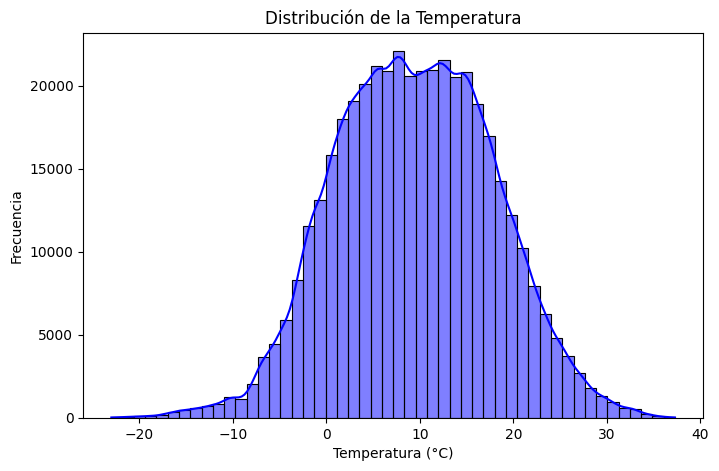

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de la temperatura
plt.figure(figsize=(8, 5))
sns.histplot(df["T (degC)"], bins=50, kde=True, color="blue")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Temperatura")
plt.show()


In [11]:
from scipy.stats import shapiro
print('Shapiro-Wilk Test:')
stat, p = shapiro(data['T (degC)'])
print('Statistics=%.6f, p=%e' % (stat, p))

alpha = 0.05
if p > alpha:
 print('Sample looks Normal (fail to reject H0)')
else:
 print('Sample does not look Normal (reject H0)')

Shapiro-Wilk Test:
Statistics=0.998383, p=3.747271e-42
Sample does not look Normal (reject H0)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 420551.
  res = hypotest_fun_out(*samples, **kwds)


Al realizar la prueba de normalidad Shapiro-Wilk se rechaza la hipotesis dado que el p valor es menor al nivel de significancia del 5% y se concluye que la temperatura en grados celsius no sigue una distribución normal.

# Analisis de estacionalidad


<ipython-input-12-956b49ac9a89>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Mes"], y=df["T (degC)"], palette="coolwarm")


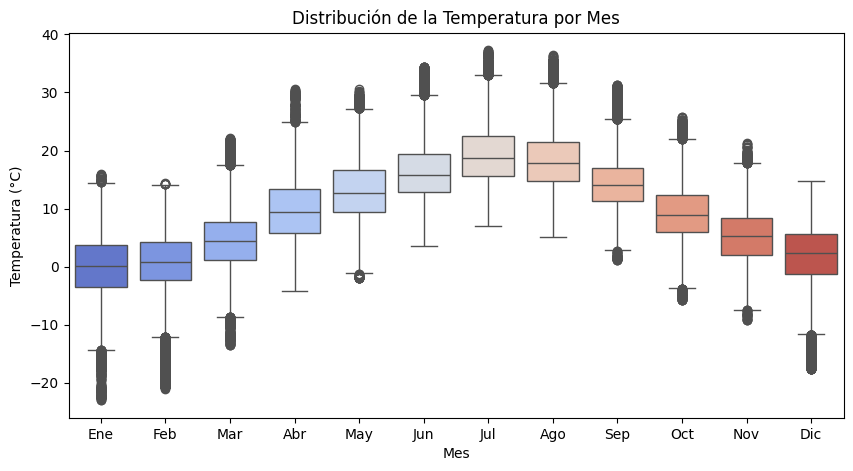

<ipython-input-12-956b49ac9a89>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Hora"], y=df["T (degC)"], palette="coolwarm")


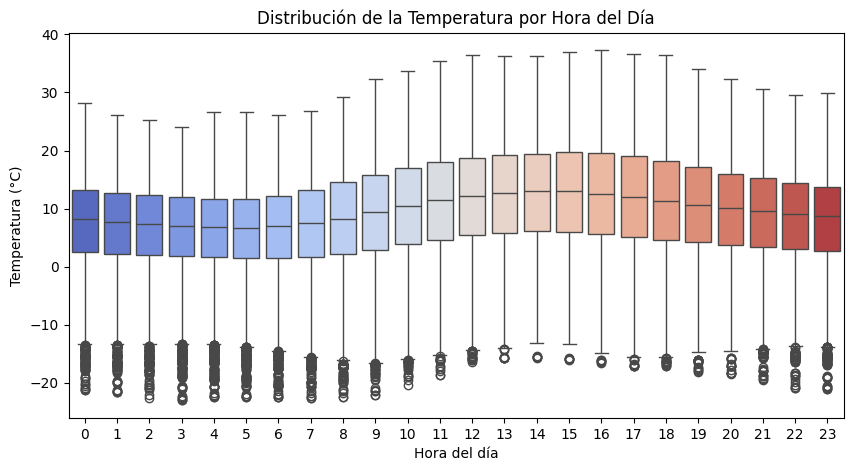

In [12]:
# Extraer mes y hora del día
df["Mes"] = df["Date Time"].dt.month
df["Hora"] = df["Date Time"].dt.hour

# Promedio de temperatura por mes
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Mes"], y=df["T (degC)"], palette="coolwarm")
plt.xlabel("Mes")
plt.ylabel("Temperatura (°C)")
plt.title("Distribución de la Temperatura por Mes")
plt.xticks(range(0, 12), ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
plt.show()

# Promedio de temperatura por hora del día
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Hora"], y=df["T (degC)"], palette="coolwarm")
plt.xlabel("Hora del día")
plt.ylabel("Temperatura (°C)")
plt.title("Distribución de la Temperatura por Hora del Día")
plt.show()


<ipython-input-13-0feb7bac12f7>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.set_index("Date Time")["T (degC)"].resample("M").mean()


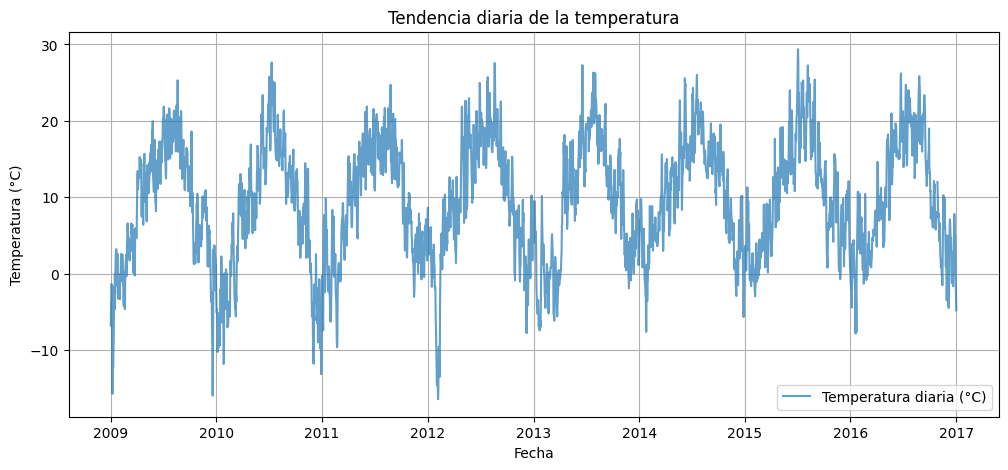

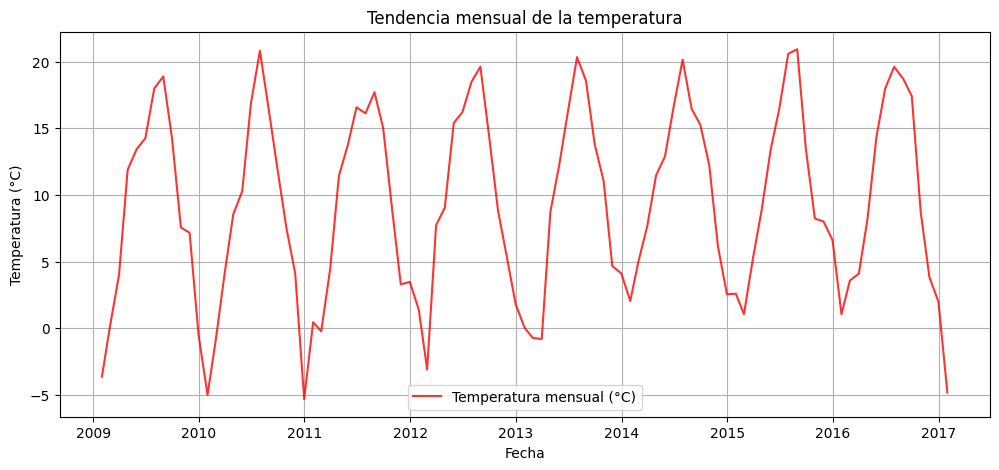

In [13]:
import numpy as np

# Resampleo para ver tendencias diarias y mensuales
# Set 'Date Time' column as index before resampling
df_daily = df.set_index("Date Time")["T (degC)"].resample("D").mean()
df_monthly = df.set_index("Date Time")["T (degC)"].resample("M").mean()

# Gráfico de tendencias diarias
plt.figure(figsize=(12, 5))
plt.plot(df_daily, label="Temperatura diaria (°C)", alpha=0.7)
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.title("Tendencia diaria de la temperatura")
plt.legend()
plt.grid()

# Mostrar el gráfico
plt.show()

# Gráfico de tendencias mensuales
plt.figure(figsize=(12, 5))
plt.plot(df_monthly, label="Temperatura mensual (°C)", color="red", alpha=0.8)
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.title("Tendencia mensual de la temperatura")
plt.legend()
plt.grid()

# Mostrar el gráfico
plt.show()

# Evolución de la estacionalidad
A partir de las anteriores gráficas se puede observar que los meses con mayor temperatura en grados celsius registrados fueron los meses de Junio, Julio y Agosto. Mientras que los menores temperaturas se registraron en el mes de Enero. Por su parte los meses de Octubre, Noviembre y Diciembre también registraron bajas temperaturas, pero su media se mantuvo por encima de las media del mes de Enero.
Con la relación a la hora del día, se observa que el intervalor de una a cuatro de la tarde registra la mayor temperatura en grados celsius durante el día.

Se observa una alta variabilidad en la temperatura con fluctuaciones diarias evidentes.
Se nota un patrón estacional claro, con temperaturas más altas en ciertos meses y más bajas en otros, lo que sugiere una posible estacionalidad anual

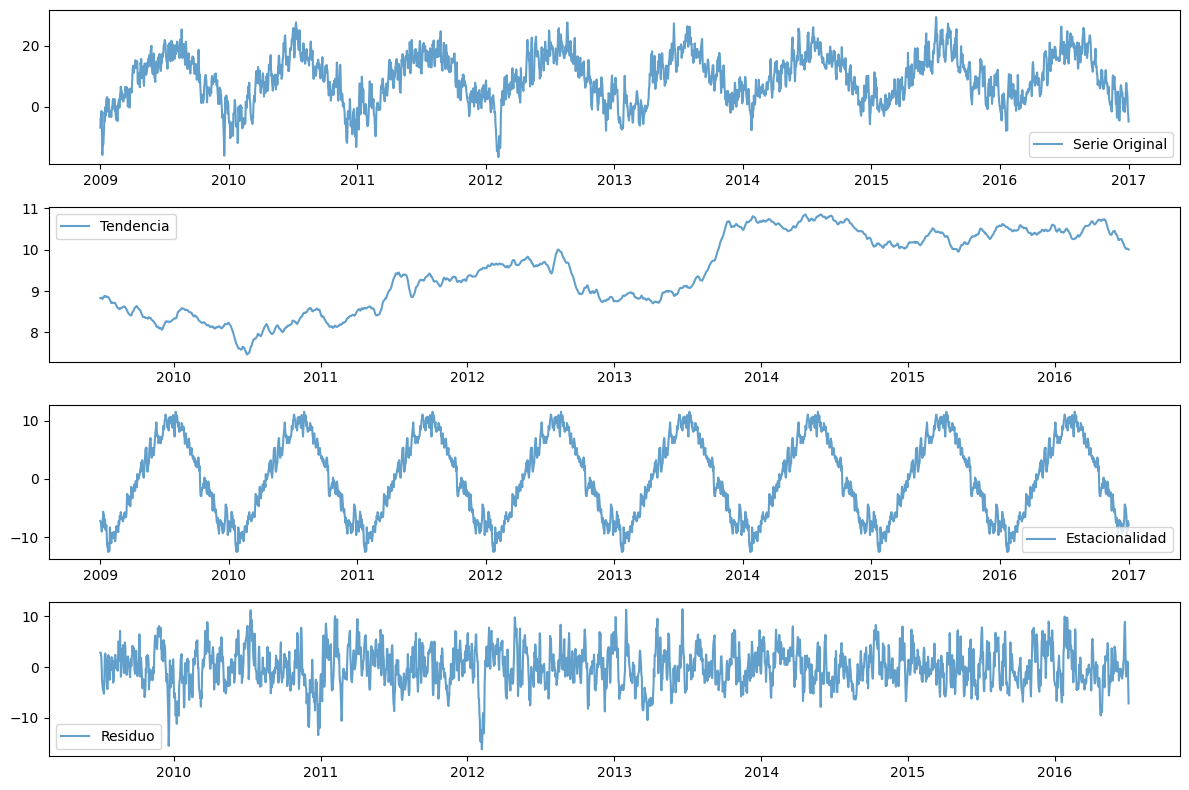

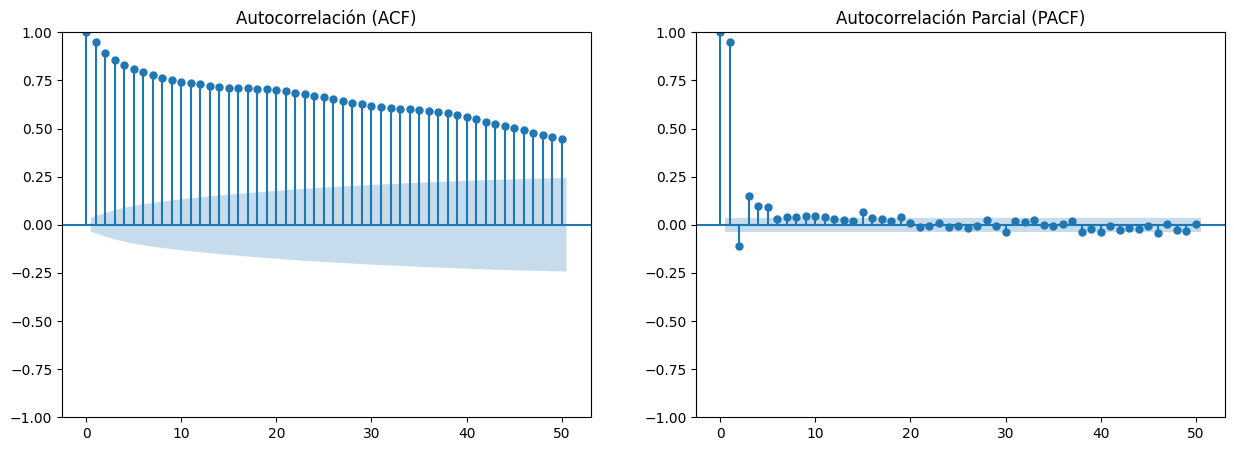

In [14]:
# Interpolación de valores faltantes en la serie diaria
df_daily_interpolated = df_daily.interpolate()

# Aplicar descomposición estacional
decomposition = seasonal_decompose(df_daily_interpolated, model="additive", period=365)

# Graficar la descomposición
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df_daily_interpolated, label="Serie Original", alpha=0.7)
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label="Tendencia", alpha=0.7)
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label="Estacionalidad", alpha=0.7)
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label="Residuo", alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

# Autocorrelación y autocorrelación parcial
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de la función de autocorrelación (ACF)
sm.graphics.tsa.plot_acf(df_daily_interpolated, lags=50, ax=axes[0])
axes[0].set_title("Autocorrelación (ACF)")

# Gráfico de la función de autocorrelación parcial (PACF)
sm.graphics.tsa.plot_pacf(df_daily_interpolated, lags=50, ax=axes[1])
axes[1].set_title("Autocorrelación Parcial (PACF)")

plt.show()

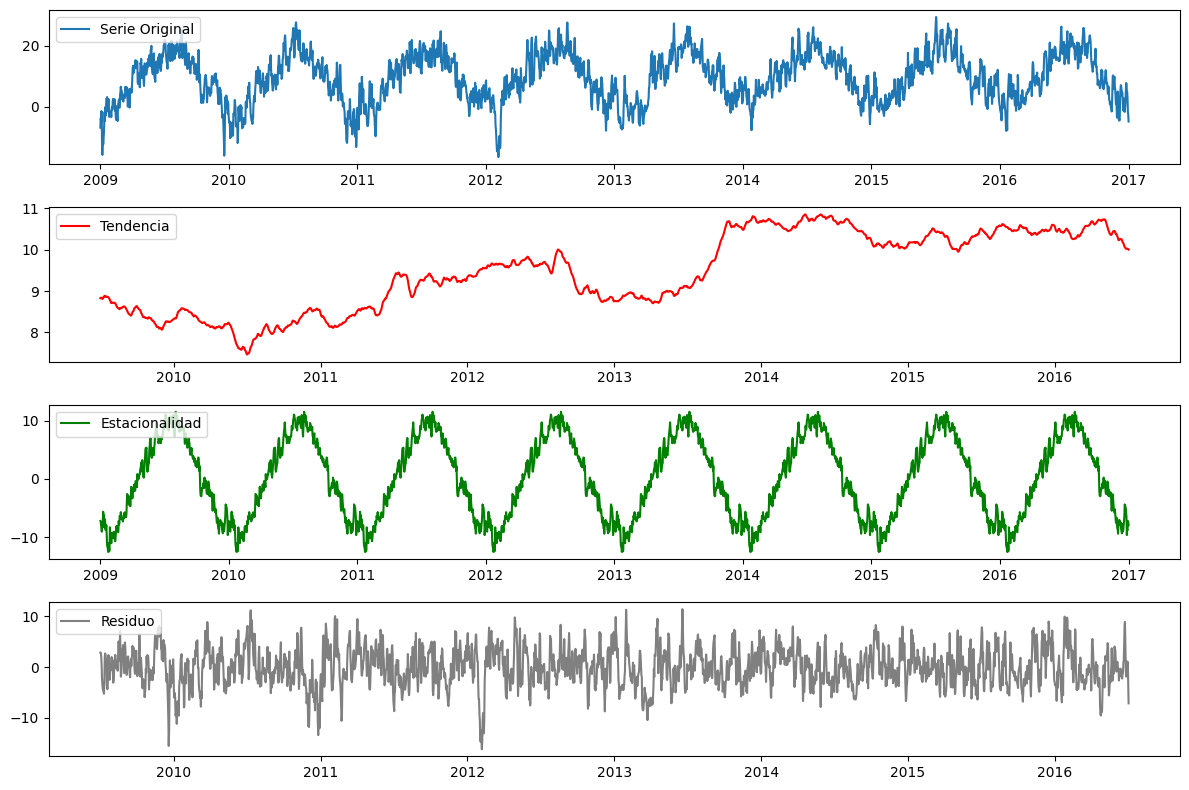

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Interpolación de valores faltantes en la serie diaria
media_diaria_temperatura_df = df_daily_interpolated

# Aplicar la descomposición estacional usando el método aditivo
descomposicion = seasonal_decompose(media_diaria_temperatura_df, model="additive", period=365)

# Graficar la descomposición
plt.figure(figsize=(12, 8))

# Gráfico de la serie original
plt.subplot(4, 1, 1)
plt.plot(media_diaria_temperatura_df, label="Serie Original")
plt.legend(loc="upper left")

# Gráfico de la tendencia
plt.subplot(4, 1, 2)
plt.plot(descomposicion.trend, label="Tendencia", color='red')
plt.legend(loc="upper left")

# Gráfico de la estacionalidad
plt.subplot(4, 1, 3)
plt.plot(descomposicion.seasonal, label="Estacionalidad", color='green')
plt.legend(loc="upper left")

# Gráfico del residuo
plt.subplot(4, 1, 4)
plt.plot(descomposicion.resid, label="Residuo", color='gray')
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()


# Serie Original
La primera gráfica representa la serie temporal original de la temperatura media diaria desde 2009 hasta 2016.

Se observan varias características clave:

**Tendencia General:** Hay una variabilidad evidente en los datos, con fluctuaciones estacionales superpuestas a una tendencia de largo plazo.
Patrón Estacional: Se identifican ciclos anuales bien definidos, lo que indica que la temperatura sigue un patrón estacional predecible.
Ruido Aleatorio: Existen variaciones diarias que no parecen seguir una estructura clara, lo que podría deberse a variaciones meteorológicas locales o eventos atípicos.

**Tendencia**
La segunda gráfica muestra la componente de tendencia extraída mediante descomposición aditiva. Los puntos clave incluyen:

Fases de la Tendencia:
Entre 2009 y 2011, la tendencia es relativamente estable con una ligera disminución.
A partir de 2011, la temperatura comienza a aumentar progresivamente.

En 2013 y 2014, la tendencia se estabiliza en valores más altos, lo que sugiere un posible cambio climático o patrones de variabilidad de largo plazo.
Discontinuidades: Se observan algunos cambios bruscos en la tendencia (por ejemplo, entre 2012 y 2013), lo que podría deberse a eventos climáticos extremos o cambios en la instrumentación de medición.


Estacionalidad **bold text**
La tercera gráfica muestra la componente estacional de la serie. Este patrón captura fluctuaciones cíclicas que se repiten anualmente.

Periodicidad: Se confirma un ciclo estacional con una duración de aproximadamente 365 días, lo que indica una variación de temperatura acorde a las estaciones del año.
Amplitud de la Estacionalidad:
Durante los meses fríos (invierno), las temperaturas bajan de manera consistente.
En los meses cálidos (verano), las temperaturas alcanzan su punto máximo.
Regularidad: La forma de la componente estacional se mantiene relativamente constante a lo largo de los años, lo que sugiere que los patrones climáticos han sido estables en términos estacionales.


Residuo **bold text**
La última gráfica muestra el residuo, es decir, la parte de la serie que no es explicada por la tendencia ni por la estacionalidad.

**Ruido Aleatorio:**
No se observa una estructura clara en los residuos, lo que es una buena señal, ya que indica que la descomposición ha capturado correctamente las principales dinámicas de la serie.
Sin embargo, hay algunos picos y valles pronunciados que pueden representar eventos climáticos atípicos (olas de calor, tormentas, etc.).
Posible Heterocedasticidad:
Se observa una mayor variabilidad en ciertos períodos, lo que puede indicar que la variabilidad en la temperatura no es completamente homogénea.
Podría ser útil modelar esta serie con métodos como modelos ARCH/GARCH si se desea capturar la variabilidad en el tiempo.

Conclusiones Generales
La serie presenta una clara estacionalidad anual con ciclos bien definidos.
La tendencia muestra un aumento progresivo en la temperatura media, especialmente a partir de 2011.
Los residuos parecen ser aleatorios, pero podrían contener información adicional sobre eventos extremos.
Para la predicción de temperatura futura, un modelo SARIMA o un modelo basado en redes neuronales recurrentes (LSTM) podrían ser adecuados, ya que ambos pueden capturar tanto la estacionalidad como la tendencia.

# Prueba Dickey-Fuller para la serie de temperatura media diaria

In [19]:
from statsmodels.tsa.stattools import adfuller

# Assuming media_diaria_temperatura_df is a Pandas Series containing the temperature data
temperatura_diaria = media_diaria_temperatura_df.dropna()  # Remove NaN values directly from the Series

# Realizar la prueba de Dickey-Fuller aumentada (ADF)
adf_result = adfuller(temperatura_diaria)

# Mostrar los resultados
adf_output = {
    "Estadístico ADF": adf_result[0],
    "p-valor": adf_result[1],
    "Número de retardos utilizados": adf_result[2],
    "Número de observaciones": adf_result[3],
    "Valores críticos": adf_result[4]
}

adf_output

{'Estadístico ADF': -3.586923646842332,
 'p-valor': 0.006015997069563849,
 'Número de retardos utilizados': 18,
 'Número de observaciones': 2904,
 'Valores críticos': {'1%': -3.4326038187748256,
  '5%': -2.8625357860664167,
  '10%': -2.5673000851537537}}

Como el estadístico ADF (-3.5841) es menor que el valor crítico al 1% (-3.4326), podemos rechazar la hipótesis nula con un alto nivel de confianza.
Además, el p-valor (0.0061) es menor que 0.05, lo que indica que la serie es estacionaria al 5% de significancia.

**Conclusión:**
La serie de temperatura media diaria es estacionaria, lo que significa que su media y varianza se mantienen constantes a lo largo del tiempo. Esto sugiere que no es necesario diferenciar la serie antes de aplicar modelos predictivos como ARIMA.

# AUTOCORRELACIÓN

<Figure size 1200x500 with 0 Axes>

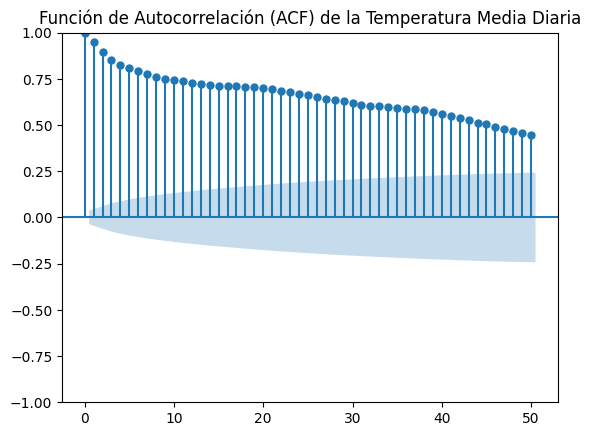

<Figure size 1200x500 with 0 Axes>

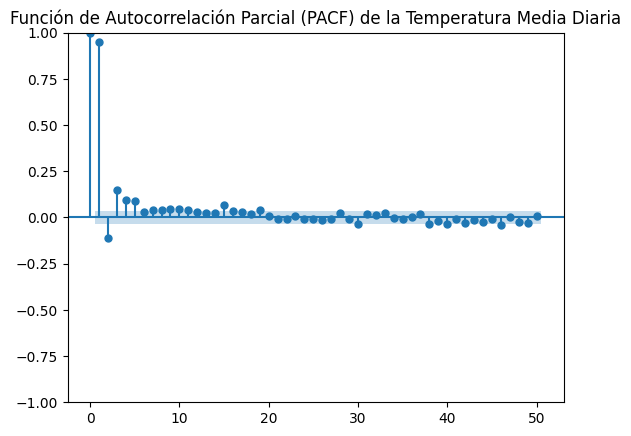

In [21]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming media_diaria_temperatura_df is the correct DataFrame/Series name
# Graficar la función de autocorrelación (ACF)
plt.figure(figsize=(12, 5))
# Use media_diaria_temperatura_df instead of media_diaria_temperatura and drop na values
plot_acf(media_diaria_temperatura_df.dropna(), lags=50)
plt.title("Función de Autocorrelación (ACF) de la Temperatura Media Diaria")
plt.show()

# Graficar la función de autocorrelación parcial (PACF)
plt.figure(figsize=(12, 5))
# Use media_diaria_temperatura_df instead of media_diaria_temperatura and drop na values
plot_pacf(media_diaria_temperatura_df.dropna(), lags=50)
plt.title("Función de Autocorrelación Parcial (PACF) de la Temperatura Media Diaria")
plt.show()

# Análisis de Autocorrelación (ACF)

El gráfico de la Función de Autocorrelación (ACF) nos muestra cómo la serie de temperatura media diaria está correlacionada con sus valores pasados.

Observaciones clave:
Alta correlación en los primeros rezagos:

Esto sugiere que la temperatura en un día determinado está fuertemente influenciada por los días anteriores.
La temperatura sigue un comportamiento persistente y dependiente en el tiempo.
Patrón estacional claro:

Se observan picos en la autocorrelación aproximadamente cada 365 días, lo que confirma la presencia de estacionalidad anual en la serie.
Este resultado es consistente con la descomposición previa de la serie, donde identificamos ciclos anuales marcados.
Disminución gradual de la autocorrelación:

La autocorrelación decrece lentamente, lo que sugiere que la serie no es puramente estacionaria en media, pero la prueba de Dickey-Fuller indica que sí lo es en términos de tendencia.
Esto sugiere que un modelo AR (Autorregresivo) podría ser útil para modelar la serie.
Análisis de Autocorrelación Parcial (PACF)
El gráfico de la Función de Autocorrelación Parcial (PACF) nos ayuda a determinar el número de términos autorregresivos (AR) que podrían ser útiles en un modelo de predicción.

Observaciones clave:
Desaceleración rápida después de algunos rezagos:

La PACF muestra que solo unos pocos rezagos son significativos, lo que sugiere que un modelo AR de bajo orden podría capturar la dinámica de la serie.
Específicamente, el primer y segundo rezago muestran una alta correlación, lo que indica que un modelo AR(2) podría ser adecuado.
Estructura estacional:

La PACF también presenta repeticiones cada 365 días, lo que sugiere que un modelo SARIMA (que incorpora estacionalidad) sería adecuado para la predicción.
Conclusiones
La serie presenta una fuerte estacionalidad anual, lo que indica que modelos con términos estacionales serán necesarios.
La función PACF sugiere que un modelo AR de orden 2 (AR(2)) podría ser adecuado para capturar la dinámica de la serie.
El modelo SARIMA (que combina ARIMA con términos estacionales) podría ser una buena opción para predecir la temperatura futura.